### Exercise 1
#### #2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import astropy
import astropy.units as u
import astropy.constants as const

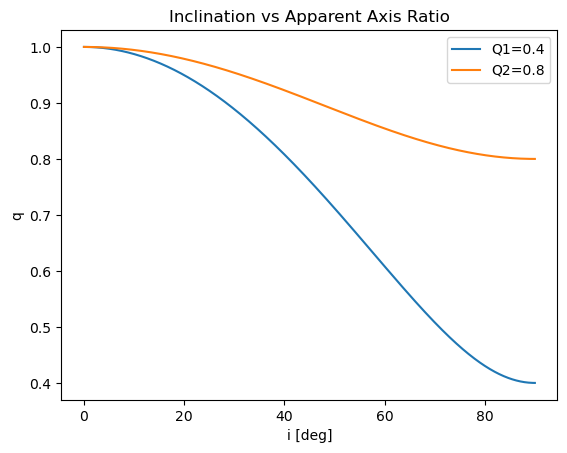

In [19]:
#(a)
def q(i, Q):
    return np.sqrt(Q*Q*pow(np.sin(i), 2) + pow(np.cos(i), 2))

i = np.linspace(0, np.pi/2, 1000)
Q1 = 0.4
Q2 = 0.8
q1 = q(i, Q1)
q2 = q(i, Q2)

plt.plot(np.degrees(i), q1, label='Q1=0.4')
plt.plot(np.degrees(i), q2, label='Q2=0.8')
plt.xlabel('i [deg]')
plt.ylabel('q')
plt.legend()
plt.title('Inclination vs Apparent Axis Ratio')
plt.show()


/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_79825/36563876.py:3: RuntimeWarning: divide by zero encountered in divide
  return q/np.sqrt(1-Q**2)/np.sqrt(q**2-Q**2)


<function matplotlib.pyplot.show(close=None, block=None)>

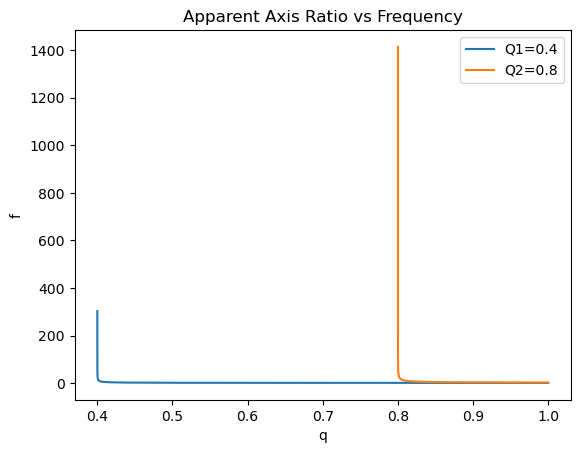

In [22]:
#(b)
def f(q, Q):
    return q/np.sqrt(1-Q**2)/np.sqrt(q**2-Q**2)

f1 = f(q(i,Q1),Q1)
f2 = f(q(i,Q2),Q2)

plt.plot(q1[:-1], f1[:-1], label='Q1=0.4')
plt.plot(q2[:-1], f2[:-1], label='Q2=0.8')
plt.xlabel('q')
plt.ylabel('f')
plt.title('Apparent Axis Ratio vs Frequency')
plt.legend()
plt.show

In [25]:
from scipy.integrate import quad
from scipy.optimize import brentq

Q1 = 0.4
Q2 = 0.8

def f(q, Q):
    return q/np.sqrt(1-Q**2)/np.sqrt(q**2-Q**2)

def qf(q, Q):
    return q*f(q, Q)

def cdf_half(q, Q, start, tot_f):
    result, _ = quad(f, start, q, args=(Q,))
    return result/tot_f  - 0.5

def stats(Q, start):
    # total
    tot_f = quad(f, start, 1, args=(Q,))[0]
    
    # mean
    mean = quad(qf, start, 1, args=(Q,))[0]/tot_f
    print("Mean:", mean)
    
    # median
    median = brentq(cdf_half, start, 1, args=(Q, start, tot_f))
    print("Median:", median)

print('Q1=0.4')
stats(Q1, q1[-2])
print('Q2=0.8')
stats(Q2, q2[-2])

Q1=0.4
Mean: 0.637134310618598
Median: 0.6088192784165489
Q2=0.8
Mean: 0.8697882287881309
Median: 0.854566117254915
